# Keras deep perceptron neural network on iris dataset

In [1]:
%autosave 120
from psychedelic.jupyter_implicit import *

Autosaving every 120 seconds


Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
import numpy as np
np.random.seed(1337)
import datetime
from IPython.display import SVG
import keras
from keras.datasets import mnist
from keras.layers import Dense, Flatten
from keras.layers import Conv1D, Conv2D, MaxPooling1D, MaxPooling2D, Dropout
from keras.models import Sequential
from keras.utils import plot_model
from keras.utils.vis_utils import model_to_dot
import matplotlib.pylab as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style = 'ticks')
sns.set_palette('husl')
import talos as ta

In [3]:
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 10]

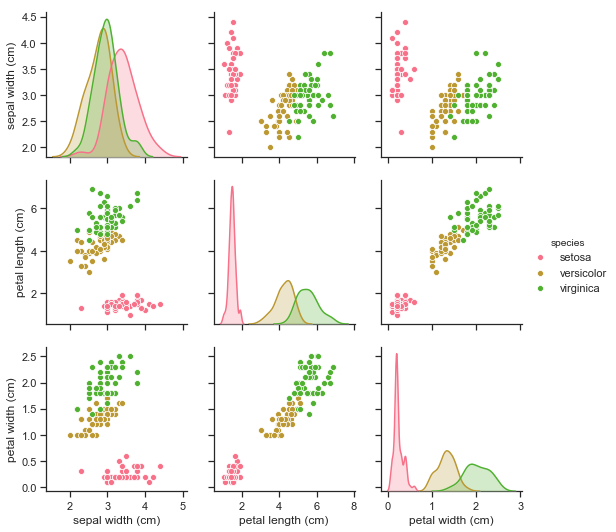

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['species'] = pd.Series(iris.target).map(dict(zip(range(3), iris.target_names)))
#df.head()

sns.pairplot(df.iloc[:, 1:6], hue="species");

df['labels'] = df['species'].astype('category').cat.codes
x = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
y = df['labels']
num_classes = len(y.unique())
y = keras.utils.to_categorical(y, len(y.unique()))
x = np.asarray(x)
y = np.asarray(y)
x = x.reshape(len(x), 4, 1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, shuffle=True)

In [5]:
model_name = UUID4MIN()
print('model name:', model_name)
model = Sequential()
model.add(Conv1D(32, (3), input_shape=(4, 1), activation='tanh'))
model.add(MaxPooling1D(pool_size=(2)))
model.add(Flatten())
model.add(Dropout(rate=0.5))
model.add(Dense(100, activation='tanh'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer="nadam", metrics=['accuracy'])
plot_model(model, to_file="model.png")
model.summary()

model name: 2ea38b96
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 2, 32)             128       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 1, 32)             0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 32)                0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               3300      
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 303       
Total params: 3,731
Trainable params: 3,731
Non-trainable params: 0
_____________________________________________________

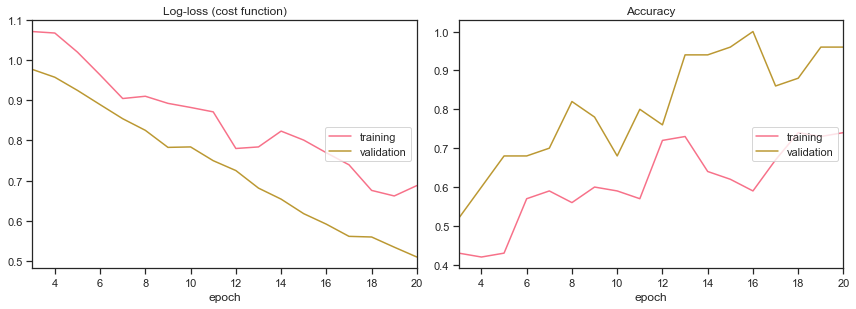

Log-loss (cost function):
training   (min:    0.662, max:    1.260, cur:    0.688)
validation (min:    0.509, max:    1.032, cur:    0.509)

Accuracy:
training   (min:    0.340, max:    0.740, cur:    0.740)
validation (min:    0.220, max:    1.000, cur:    0.960)
epoch 20 of epochs 20 (ETA: 2019-12-04T220549Z)
save to 2019-12-04T220534Z_2ea38b96_model.ph5


In [6]:
stop_early_with_manual = EarlyStoppingWithManualStop(
    filename             = 'safeword_'+model_name,
    monitor              = 'val_loss',
    min_delta            = 0.0001,
    patience             = 100,
    verbose              = 1,
    mode                 = 'auto',
    baseline             = None,
    restore_best_weights = True
)
model.fit(
    x_train,
    y_train,
    batch_size      = 128,
    epochs          = 20,
    verbose         = False,
    validation_data = (x_test, y_test),
    callbacks       = [TensorBoardCallback(model_name=model_name), PlotLossesCallback(), ProgressStatus(clear_output_continuously=False)]
)
filepath = save_model(model, model_name=model_name)

In [7]:
score = model.evaluate(x_test, y_test, verbose=False)
score[1]

0.9599999904632568